<font size=5> **Looking at Vaccine Effectiveness Against Hospitalizations Regarding COVID-19** </font>   
<br/>
Gabriel Sagrera  
[Link to Github site](https://gsagrera.github.io/)

<font size=3> **Project Goals**</font>  
For this project I will be investigating datasets regarding COVID-19 such as hospitalizations, positive cases, and vaccinations in Louisiana. These will be looked at to see if vaccination show a distinct reduction in cases and at what point it occurs. Most  of the data is taken from the [Louisiana Department of Health](https://ldh.la.gov/page/louisiana-coronavirus) website getting data that is split into parishes and has day to day updates. One of the data sets is the census data split up into parishes taken from [Louisiana state government site.](https://www.louisiana.gov/demographics-and-geography/)

<font size=3> **Extraction, Transformation, and Load**</font>  
There are currently four datasets that I am looking at that are downloaded from a [dataset folder](https://data.world/gsagrera/covid-data-louisiana) I created as there were issues with downloading the data in Google Colab. The first dataset is the amount of hospitalized patients in Louisiana defined as patient admissions confirmed to have COVID-19.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.linear_model import LinearRegression

In [2]:
hospitalizations = pd.read_excel('https://query.data.world/s/s3ww36eg7dxvvbxybnb4csyjpn5wik?dws=00000')
hospitalizations.head(15)

,DateTime,Unnamed: 1
0,3/14/20,NaN
1,3/15/20,NaN
2,3/16/20,NaN
3,3/17/20,NaN
4,3/18/20,NaN
5,3/19/20,NaN
6,3/20/20,NaN
7,3/21/20,NaN
8,3/22/20,NaN
9,3/23/20,NaN


As can be seen, the dataset can be cleaned up by changing the column names and make the date easier to handle in pandas.

In [3]:
hospitalizations.rename(columns={"DateTime":"Date", "Unnamed: 1":"Hospitalizations"}, inplace=True)
hospitalizations["Date"] = pd.to_datetime(hospitalizations["Date"])
display(hospitalizations.dtypes)
hospitalizations.head(15)

Date                datetime64[ns]
Hospitalizations           float64
dtype: object

,Date,Hospitalizations
0,2020-03-14,NaN
1,2020-03-15,NaN
2,2020-03-16,NaN
3,2020-03-17,NaN
4,2020-03-18,NaN
5,2020-03-19,NaN
6,2020-03-20,NaN
7,2020-03-21,NaN
8,2020-03-22,NaN
9,2020-03-23,NaN


Now that the first dataset is cleaned up the next dataset describing tests and cases by day in each Parish. The tests are splint into total, positive, and negative counts as well as a count of new cases as a positive test does not correlate directly to new cases as new cases are new infections. As the analysis will deal with cases, the test counts can be removed from the dataset.

In [4]:
parish_cases = pd.read_excel('https://query.data.world/s/pu5qu4hofiphkuyak4nbiychdofgol?dws=00000')
parish_cases.head(15)

,Lab Collection Date,Parish,Daily Test Count,Daily Negative Test Count,Daily Positive Test Count,Daily Case Count
0,2020-03-01,Acadia,0,0,0,0
1,2020-03-02,Acadia,0,0,0,0
2,2020-03-03,Acadia,0,0,0,0
3,2020-03-04,Acadia,0,0,0,0
4,2020-03-05,Acadia,0,0,0,0
5,2020-03-06,Acadia,0,0,0,0
6,2020-03-07,Acadia,0,0,0,0
7,2020-03-08,Acadia,0,0,0,0
8,2020-03-09,Acadia,0,0,0,0
9,2020-03-10,Acadia,0,0,0,0


In [5]:
parish_cases.drop(["Daily Test Count", "Daily Negative Test Count", "Daily Positive Test Count"], axis=1, inplace=True)
parish_cases.rename(columns={"Daily Case Count":"Daily_Case_Count", "Lab Collection Date":"Date"}, inplace=True)
display(parish_cases.dtypes)
parish_cases.head(15)

Date                datetime64[ns]
Parish                      object
Daily_Case_Count             int64
dtype: object

,Date,Parish,Daily_Case_Count
0,2020-03-01,Acadia,0
1,2020-03-02,Acadia,0
2,2020-03-03,Acadia,0
3,2020-03-04,Acadia,0
4,2020-03-05,Acadia,0
5,2020-03-06,Acadia,0
6,2020-03-07,Acadia,0
7,2020-03-08,Acadia,0
8,2020-03-09,Acadia,0
9,2020-03-10,Acadia,0


The third dataset shows the amount of vaccines both partially completed and fully completed broken down by parish and date as well. The FIPS column and LDH column are redundant for the analysis as they are another way to determine the location.

In [6]:
parish_vaccines = pd.read_excel('https://query.data.world/s/6fzykgfujmvhdl3x34rc642iogb6th?dws=00000')
parish_vaccines.head()

,Location,FIPS Code,LDH Region,Vaccine Admin Date,# Vaccine Initiated,# Vaccine Completed
0,Acadia,22001.0,4.0,2020-12-14,0,0
1,Acadia,22001.0,4.0,2020-12-15,14,0
2,Acadia,22001.0,4.0,2020-12-16,29,0
3,Acadia,22001.0,4.0,2020-12-17,27,0
4,Acadia,22001.0,4.0,2020-12-18,22,0


In [7]:
parish_vaccines.drop(["FIPS Code", "LDH Region"], axis=1, inplace=True)
parish_vaccines.rename(columns={"Vaccine Admin Date":"Date", "# Vaccine Initiated":"Vaccines_Initiated", "# Vaccine Completed":"Vaccines_Completed"}, inplace=True)
display(parish_vaccines.dtypes)
parish_vaccines.head()

Location                      object
Date                  datetime64[ns]
Vaccines_Initiated             int64
Vaccines_Completed             int64
dtype: object

,Location,Date,Vaccines_Initiated,Vaccines_Completed
0,Acadia,2020-12-14,0,0
1,Acadia,2020-12-15,14,0
2,Acadia,2020-12-16,29,0
3,Acadia,2020-12-17,27,0
4,Acadia,2020-12-18,22,0


The fourth dataset is the population counts for each parish as well as the entire state for the year 2010 and 2020.

In [8]:
pop = pd.read_excel('https://query.data.world/s/r433ojyg4fep6vpor7dykkoa7j552f?dws=00000')

In [9]:
pop.head()

,"Louisiana Resident Population by Parish: April 1, 2010 to April 1, 2020",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Geographic Area,4/1/2010 Census,4/1/2020 Census,Percent Change in Population 2010-2020
1,Louisiana,4533487,4657757,0.027412
2,Acadia,61787,57576,-0.068153
3,Allen,25747,22750,-0.116402
4,Ascension,107215,126500,0.179872


Due to the columns not being read in properly, we have to remove the first entry and rename all the columns.

In [10]:
pop.drop([0], inplace=True)
pop.rename(columns={"Louisiana Resident Population by Parish: April 1, 2010 to April 1, 2020":"Geographic_Area", "Unnamed: 1":"pop2010",
                    "Unnamed: 2":"pop2020", "Unnamed: 3":"Percent_change"}, inplace=True)
pop.head()

,Geographic_Area,pop2010,pop2020,Percent_change
1,Louisiana,4533487,4657757,0.027412
2,Acadia,61787,57576,-0.068153
3,Allen,25747,22750,-0.116402
4,Ascension,107215,126500,0.179872
5,Assumption,23416,21039,-0.101512


We only need the columns for geographic area and population from 2020 as we are only looking at data from 2020 to 2023.

In [11]:
pop.drop(columns=["pop2010", "Percent_change"], inplace=True)
pop.head()

,Geographic_Area,pop2020
1,Louisiana,4657757
2,Acadia,57576
3,Allen,22750
4,Ascension,126500
5,Assumption,21039


This final data set is similar to the previous data set of vaccine counts but is the count across the state rather than broken down by parish.

In [12]:
vaccState = pd.read_excel('https://query.data.world/s/iwpakwbji4db4ueuyonxvjxkuh6mgc?dws=00000')
vaccState.head()

,Vaccine Admin Date,Location,# Vaccine Initiated,# Vaccine Completed
0,2020-12-14,Louisiana,560,2
1,2020-12-15,Louisiana,2206,13
2,2020-12-16,Louisiana,5100,17
3,2020-12-17,Louisiana,6011,18
4,2020-12-18,Louisiana,5802,2


Since we only need to look at the completed vaccine amounts and the date, we can remove the other columns.

In [13]:
vaccState.rename(columns={"Vaccine Admin Date":"Date", "# Vaccine Completed":"Vaccine_complete"}, inplace=True)
vaccState.head()
vaccState.drop(columns=["Location", "# Vaccine Initiated"], inplace=True)
vaccState.head()

,Date,Vaccine_complete
0,2020-12-14,2
1,2020-12-15,13
2,2020-12-16,17
3,2020-12-17,18
4,2020-12-18,2


Now the null entries will be checked and replaced if necessary.

In [14]:
display(hospitalizations.isnull().sum())
display(parish_cases.isnull().sum())
display(parish_vaccines.isnull().sum())
display(vaccState.isnull().sum())
pop.isnull().sum()

Date                 0
Hospitalizations    10
dtype: int64

Date                0
Parish              0
Daily_Case_Count    0
dtype: int64

Location              0
Date                  0
Vaccines_Initiated    0
Vaccines_Completed    0
dtype: int64

Date                0
Vaccine_complete    0
dtype: int64

Geographic_Area    0
pop2020            0
dtype: int64

The NaN values will not be replaced as the NaN value in the hospitalization data represents a time when data was not available and so there is no way to guess at what would replace the value. Zero would not be a valid replacement either as that would suggest no one was hospitalized due to covid 19 rather than an unknown amount.

In [15]:
parish_cases_indexed = parish_cases.set_index("Date")
hospitalizations_indexed = hospitalizations.set_index("Date")
display(parish_cases_indexed.head())
hospitalizations_indexed.head()

,Parish,Daily_Case_Count
Date,,
2020-03-01,Acadia,0
2020-03-02,Acadia,0
2020-03-03,Acadia,0
2020-03-04,Acadia,0
2020-03-05,Acadia,0


,Hospitalizations
Date,
2020-03-14,NaN
2020-03-15,NaN
2020-03-16,NaN
2020-03-17,NaN
2020-03-18,NaN


Now to get a visual of how the number of cases, hospitalizations, and completed vaccinations compare, a line graph over time will be made as well as a correlation table.

<ipython-input-16-c621dc7e8c2c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Date_plot = Date_plot.append(Acadia_plot, ignore_index=True)


<Axes: xlabel='Date'>

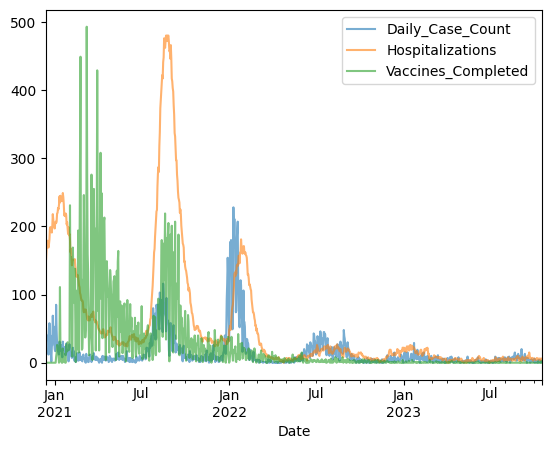

In [16]:
Acadia_cases = parish_cases[parish_cases.Parish=="Acadia"]
Acadia_plot = Acadia_cases.loc[288:]
hosp_plot = hospitalizations.loc[275:1313]
vaccine_plot = parish_vaccines[parish_vaccines.Location=="Acadia"]
Date_plot = pd.DataFrame()
Date_plot = Date_plot.append(Acadia_plot, ignore_index=True)
Date_plot = Date_plot.merge(hosp_plot, on=["Date"])
Date_plot = Date_plot.merge(vaccine_plot, on=["Date"])
Date_plot = Date_plot.drop(["Location", "Vaccines_Initiated", "Parish"], axis=1)
Date_plot.set_index("Date", inplace=True)
Date_plot.plot.line(alpha=.6)

As can be seen in the line plot, the timing of spikes in cases and hospitalizations as expected since hospitalized people would have likely counted as a new case for the day. There is also a decrease in cases over time as vaccinations increase the hospitalizations and cases tend to decrease.  

In [17]:
Date_plot.corr()

,Daily_Case_Count,Hospitalizations,Vaccines_Completed
Daily_Case_Count,1.000000,0.467372,0.116333
Hospitalizations,0.467372,1.000000,0.409593
Vaccines_Completed,0.116333,0.409593,1.000000


From the correlation matrix there would appear to be a correlation of vaccinations causing hospitalizations. There are multiple issues with this correlation matrix with the most prominent being that it at the very least does not take into account the fact that vaccines take about a month until they begin working. Therefore a more complicated method will be used to see if there is a correlation between vaccinations and hospitalizations. The monthly sum will be taken of vaccinations and of hospitalizations and divided by the population of the area to create a rate. Then, the difference of the rates between each month will be calculated. The array created will be adjusted so that vaccinations will be compared to hospitalizations one month later. These will then be run through a linear regression model and the coefficient will be looked at to determine if there is a positive or negative correlation between the two. This is done to mitigate the effect of surges as those will continue to occur even  with vaccinations just in reduced amounts.

Here the sum is computed for each month for vaccinations and hospitalizations.

In [18]:
monthlySumH = hosp_plot['Hospitalizations'].groupby(hosp_plot['Date'].dt.to_period('M')).sum()
print(monthlySumH)

Date
2020-12     3375.0
2021-01     6816.0
2021-02     3731.0
2021-03     2129.0
2021-04     1357.0
2021-05      944.0
2021-06     1018.0
2021-07     2251.0
2021-08    12294.0
2021-09     8427.0
2021-10     2511.0
2021-11     1041.0
2021-12      977.0
2022-01     3804.0
2022-02     3015.0
2022-03      579.0
2022-04      145.0
2022-05      197.0
2022-06      306.0
2022-07      596.0
2022-08      556.0
2022-09      415.0
2022-10      246.0
2022-11      146.0
2022-12      475.0
2023-01      623.0
2023-02      393.0
2023-03      212.0
2023-04      108.0
2023-05       85.0
2023-06      130.0
2023-07      132.0
2023-08      168.0
2023-09      199.0
2023-10       96.0
Freq: M, Name: Hospitalizations, dtype: float64


In [19]:
monthlySumVaccState = vaccState['Vaccine_complete'].groupby(vaccState['Date'].dt.to_period('M')).sum()
print(monthlySumVaccState)

Date
2020-12       107
2021-01    106347
2021-02    308971
2021-03    447195
2021-04    484339
2021-05    175898
2021-06    126780
2021-07     85017
2021-08    217193
2021-09    166549
2021-10     76276
2021-11     50857
2021-12     62844
2022-01     50826
2022-02     31052
2022-03     18322
2022-04     10811
2022-05      8772
2022-06      8171
2022-07      7412
2022-08      8251
2022-09      5436
2022-10      4880
2022-11      3561
2022-12      2749
2023-01      2194
2023-02      1482
2023-03      1364
2023-04      1034
2023-05       766
2023-06       511
2023-07       330
2023-08       403
2023-09       359
2023-10       787
Freq: M, Name: Vaccine_complete, dtype: int64


Now the rates will be calculated for each and converted into an array.

In [20]:
pop[pop.Geographic_Area=="Louisiana"].pop2020

1    4657757
Name: pop2020, dtype: object

In [21]:
monthlyRateVState = monthlySumVaccState/4657757
monthlyRateVState = monthlyRateVState.to_frame()

In [22]:
monthsVacc = monthlyRateVState.Vaccine_complete

In [23]:
monthsVacc = monthsVacc.to_numpy()
monthsVacc

array([2.29724307e-05, 2.28322345e-02, 6.63347186e-02, 9.60108052e-02,
       1.03985459e-01, 3.77645291e-02, 2.72191100e-02, 1.82527770e-02,
       4.66303845e-02, 3.57573399e-02, 1.63761227e-02, 1.09187749e-02,
       1.34923312e-02, 1.09121193e-02, 6.66672821e-03, 3.93365304e-03,
       2.32107429e-03, 1.88330993e-03, 1.75427786e-03, 1.59132389e-03,
       1.77145351e-03, 1.16708536e-03, 1.04771460e-03, 7.64531082e-04,
       5.90198243e-04, 4.71042178e-04, 3.18178900e-04, 2.92844818e-04,
       2.21995265e-04, 1.64456840e-04, 1.09709459e-04, 7.08495527e-05,
       8.65223325e-05, 7.70757255e-05, 1.68965448e-04])

In [24]:
monthlyRateHState = monthlySumH/4657757
monthlyRateHState = monthlyRateHState.to_frame()

In [25]:
monthsHosp = monthlyRateHState.Hospitalizations.to_numpy()

In [26]:
monthsHosp

array([7.24597698e-04, 1.46336531e-03, 8.01029337e-04, 4.57086963e-04,
       2.91341948e-04, 2.02672660e-04, 2.18560135e-04, 4.83279828e-04,
       2.63946788e-03, 1.80923994e-03, 5.39100687e-04, 2.23498134e-04,
       2.09757615e-04, 8.16702116e-04, 6.47307277e-04, 1.24308761e-04,
       3.11308641e-05, 4.22950360e-05, 6.56968580e-05, 1.27958586e-04,
       1.19370762e-04, 8.90986799e-05, 5.28151211e-05, 3.13455597e-05,
       1.01980417e-04, 1.33755368e-04, 8.43753764e-05, 4.55154702e-05,
       2.31871263e-05, 1.82491272e-05, 2.79104298e-05, 2.83398211e-05,
       3.60688632e-05, 4.27244272e-05, 2.06107790e-05])

The difference is now calculated using the diff() function from numpy.

In [27]:
X = np.diff(monthsVacc)
X

array([ 2.28092621e-02,  4.35024841e-02,  2.96760866e-02,  7.97465389e-03,
       -6.62209299e-02, -1.05454192e-02, -8.96633294e-03,  2.83776075e-02,
       -1.08730447e-02, -1.93812172e-02, -5.45734782e-03,  2.57355633e-03,
       -2.58021189e-03, -4.24539108e-03, -2.73307517e-03, -1.61257876e-03,
       -4.37764357e-04, -1.29032064e-04, -1.62953971e-04,  1.80129620e-04,
       -6.04368154e-04, -1.19370762e-04, -2.83183515e-04, -1.74332839e-04,
       -1.19156066e-04, -1.52863277e-04, -2.53340825e-05, -7.08495527e-05,
       -5.75384246e-05, -5.47473816e-05, -3.88599062e-05,  1.56727798e-05,
       -9.44660703e-06,  9.18897229e-05])

In [28]:
y = np.diff(monthsHosp)
y

array([ 7.38767609e-04, -6.62335970e-04, -3.43942374e-04, -1.65745014e-04,
       -8.86692887e-05,  1.58874755e-05,  2.64719692e-04,  2.15618805e-03,
       -8.30227940e-04, -1.27013925e-03, -3.15602553e-04, -1.37405193e-05,
        6.06944501e-04, -1.69394840e-04, -5.22998516e-04, -9.31778966e-05,
        1.11641719e-05,  2.34018219e-05,  6.22617281e-05, -8.58782457e-06,
       -3.02720816e-05, -3.62835588e-05, -2.14695614e-05,  7.06348571e-05,
        3.17749509e-05, -4.93799913e-05, -3.88599062e-05, -2.23283439e-05,
       -4.93799913e-06,  9.66130264e-06,  4.29391228e-07,  7.72904211e-06,
        6.65556404e-06, -2.21136483e-05])

Now each array is adjusted to have the right months with the vaccination data having the last month removed and the hospitalization data having the first month removed in order to account for the vaccine taking a month to become effective.

In [29]:
X = X[0:33]
X

array([ 2.28092621e-02,  4.35024841e-02,  2.96760866e-02,  7.97465389e-03,
       -6.62209299e-02, -1.05454192e-02, -8.96633294e-03,  2.83776075e-02,
       -1.08730447e-02, -1.93812172e-02, -5.45734782e-03,  2.57355633e-03,
       -2.58021189e-03, -4.24539108e-03, -2.73307517e-03, -1.61257876e-03,
       -4.37764357e-04, -1.29032064e-04, -1.62953971e-04,  1.80129620e-04,
       -6.04368154e-04, -1.19370762e-04, -2.83183515e-04, -1.74332839e-04,
       -1.19156066e-04, -1.52863277e-04, -2.53340825e-05, -7.08495527e-05,
       -5.75384246e-05, -5.47473816e-05, -3.88599062e-05,  1.56727798e-05,
       -9.44660703e-06])

In [30]:
y = y[1:35]
y

array([-6.62335970e-04, -3.43942374e-04, -1.65745014e-04, -8.86692887e-05,
        1.58874755e-05,  2.64719692e-04,  2.15618805e-03, -8.30227940e-04,
       -1.27013925e-03, -3.15602553e-04, -1.37405193e-05,  6.06944501e-04,
       -1.69394840e-04, -5.22998516e-04, -9.31778966e-05,  1.11641719e-05,
        2.34018219e-05,  6.22617281e-05, -8.58782457e-06, -3.02720816e-05,
       -3.62835588e-05, -2.14695614e-05,  7.06348571e-05,  3.17749509e-05,
       -4.93799913e-05, -3.88599062e-05, -2.23283439e-05, -4.93799913e-06,
        9.66130264e-06,  4.29391228e-07,  7.72904211e-06,  6.65556404e-06,
       -2.21136483e-05])

Here the linear regression is done and the coefficient is negative showing that vaccinaitons are negatively correlated to hospitalizations.

In [31]:
lin_reg = LinearRegression()
X = X.reshape(-1, 1)

lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-4.370961778226688e-05, array([-0.00623143]))

**Modeling**  
I decided to model future case counts when given total vaccinations in the area and previous hospitalizations using a random forest classifier. A grid search was done to find more ideal parameters for prediction and scored it by finding the accuracy. The highest accuracy acheive was 87.5%

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [36]:
Date_plot

,Daily_Case_Count,Hospitalizations,Vaccines_Completed
Date,,,
2020-12-14,50,152.0,0
2020-12-15,33,167.0,0
2020-12-16,40,169.0,0
2020-12-17,37,179.0,0
2020-12-18,37,173.0,0
...,...,...,...
2023-10-14,0,5.0,0
2023-10-15,2,6.0,0
2023-10-16,3,4.0,2


In [41]:
y = Date_plot.Daily_Case_Count
y = y.to_numpy()
y

array([50, 33, 40, ...,  3,  1,  2])

In [40]:
Data = Date_plot.drop(columns=["Daily_Case_Count"])
X = Data.to_numpy()
X

array([[152.,   0.],
       [167.,   0.],
       [169.,   0.],
       ...,
       [  4.,   2.],
       [  5.,   0.],
       [  6.,   1.]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [43]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=0)
parameters = [{"n_estimators": [10,20,50,100,200], "max_depth":[1,2,5,10,20]}]
grid_search = GridSearchCV(rnd_clf, parameters, cv=4, scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
predictions = grid_search.predict(X_test)
1-(accuracy_score(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


{'max_depth': 5, 'n_estimators': 10}


0.875

In [46]:
#%%shell
#jupyter nbconvert --to html /content/Covid_Vaccinations_and_Hospitalizations.ipynb

[NbConvertApp] Converting notebook /content/Covid_Vaccinations_and_Hospitalizations.ipynb to html
[NbConvertApp] Writing 845771 bytes to /content/Covid_Vaccinations_and_Hospitalizations.html
